<a href="https://colab.research.google.com/github/idrissdeme/Projetos-Python-IRD/blob/main/C%C3%B3digos_Essenciais_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A intenção deste notebook é deixar os códigos prontos para copiar e colar

In [ ]:
import numpy as np
import pandas as pd
from numpy.random import randn as rn

#### Criação de um dataframe com índice, header e dados aleatórios

In [ ]:
np.random.seed(101)
matrix_data = rn(5,4)
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']

df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
print("\nO dataframe tem o seguinte formato\n",'-'*45, sep='')
print(df)


O dataframe tem o seguinte formato
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509


#### Selecionando colunas

In [ ]:
print("\nA coluna 'X'\n",'-'*25, sep='')
print(df['X'])
print("\Tipo da coluna: ", type(df['X']), sep='')
print("\nSelecionando as colunas 'X' e 'Z'\n",'-'*55, sep='')
print(df[['X','Z']])
print("\nTipo do par de colunas: ", type(df[['X','Z']]), sep='')


A coluna 'X'
-------------------------
A    0.628133
B   -0.319318
C    0.740122
D   -0.758872
E    1.978757
Name: X, dtype: float64
\Tipo da coluna: <class 'pandas.core.series.Series'>

Selecionando as colunas 'X' e 'Z'
-------------------------------------------------------
          X         Z
A  0.628133  0.503826
B -0.319318  0.605965
C  0.740122 -0.589001
D -0.758872  0.955057
E  1.978757  0.683509

Tipo do par de colunas: <class 'pandas.core.frame.DataFrame'>


#### Criando colunas a partir de outras colunas

In [ ]:
print("\nUma coluna pode ser criada a partir da operação com outra coluna\n",'-'*75, sep='')
df['New'] = df['X']+df['Z']
print(df)


Uma coluna pode ser criada a partir da operação com outra coluna
---------------------------------------------------------------------------
          W         X         Y         Z       New
A  2.706850  0.628133  0.907969  0.503826  1.131958
B  0.651118 -0.319318 -0.848077  0.605965  0.286647
C -2.018168  0.740122  0.528813 -0.589001  0.151122
D  0.188695 -0.758872 -0.933237  0.955057  0.196184
E  0.190794  1.978757  2.605967  0.683509  2.662266


#### Deletando colunas

In [ ]:
df1=df.drop('A')
print("\nSe não estabelecer o axis, drop deleta a linha\n",'-'*65, sep='')
print(df1)
print("\nColocando axis=1, drop derruba uma coluna\n",'-'*75, sep='')
df.drop('New', axis=1, inplace=True)
print(df)


Se não estabelecer o axis, drop deleta a linha
-----------------------------------------------------------------
          W         X         Y         Z       New
B  0.651118 -0.319318 -0.848077  0.605965  0.286647
C -2.018168  0.740122  0.528813 -0.589001  0.151122
D  0.188695 -0.758872 -0.933237  0.955057  0.196184
E  0.190794  1.978757  2.605967  0.683509  2.662266

Colocando axis=1, drop derruba uma coluna
---------------------------------------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509


#### Selecionando células,linhas e colunas pelo .loc

In [ ]:
print("\nBaseado no nome da linha\n",'-'*60, sep='')
print("\nSelecionando uma linha\n")
print(df.loc['C'])
print("\nMais de uma linha\n")
print(df.loc[['B','C']])
print("\nElemento linha 'B' e columna 'Y'\n") 
print(df.loc['B','Y'])
print("\nSubconjunto das linhas B e D, e colunas W e Y\n")
df.loc[['B','D'],['W','Y']]


Baseado no nome da linha
------------------------------------------------------------

Selecionando uma linha

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

Mais de uma linha

          W         X         Y         Z
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001

Elemento linha 'B' e columna 'Y'

-0.8480769834036315

Subconjunto das linhas B e D, e colunas W e Y



,W,Y
B,0.651118,-0.848077
D,0.188695,-0.933237


#### Seleção condicional

In [ ]:
print(df[df.loc[['A','B','C']]>0])

          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118       NaN       NaN  0.605965
C       NaN  0.740122  0.528813       NaN
D       NaN       NaN       NaN       NaN
E       NaN       NaN       NaN       NaN


#### Missing

In [ ]:
df = pd.DataFrame({'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3]})
df['States']="CA NV AZ".split()
df.set_index('States',inplace=True)
print(df)

          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  NaN  2
AZ      NaN  NaN  3


#### Dropna

In [ ]:
print("\nDropping any rows with a NaN value\n",'-'*35, sep='')
print(df.dropna(axis=0))
print("\nDropping any column with a NaN value\n",'-'*35, sep='')
print(df.dropna(axis=1))
print("\nDropping a row with a minimum 2 NaN value using 'thresh' parameter\n",'-'*68, sep='')
print(df.dropna(axis=0, thresh=2))


Dropping any rows with a NaN value
-----------------------------------
          A    B  C
States             
CA      1.0  5.0  1

Dropping any column with a NaN value
-----------------------------------
        C
States   
CA      1
NV      2
AZ      3

Dropping a row with a minimum 2 NaN value using 'thresh' parameter
--------------------------------------------------------------------
          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  NaN  2


#### Fillna

In [ ]:
print("\nFilling values with a default value\n",'-'*35, sep='')
print(df.fillna(value='FILL VALUE'))
print("\nFilling values with a computed value (mean of column A here)\n",'-'*60, sep='')
print(df.fillna(value=df['A'].mean()))


Filling values with a default value
-----------------------------------
                 A           B  C
States                           
CA               1           5  1
NV               2  FILL VALUE  2
AZ      FILL VALUE  FILL VALUE  3

Filling values with a computed value (mean of column A here)
------------------------------------------------------------
          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  1.5  2
AZ      1.5  1.5  3


#### Group By

In [ ]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [ ]:
byComp = df.groupby('Company')
print("\nGrouping by 'Company' column and listing mean sales\n",'-'*55, sep='')
print(byComp.mean())
print("\nGrouping by 'Company' column and listing sum of sales\n",'-'*55, sep='')
print(byComp.sum())
# Note dataframe conversion of the series and transpose
print("\nAll in one line of command (Stats for 'FB')\n",'-'*65, sep='')
print(pd.DataFrame(df.groupby('Company').describe().loc['FB']).transpose())
print("\nSame type of extraction with little different command\n",'-'*68, sep='')
print(df.groupby('Company').describe().loc[['GOOG', 'MSFT']])


Grouping by 'Company' column and listing mean sales
-------------------------------------------------------
         Sales
Company       
FB       296.5
GOOG     160.0
MSFT     232.0

Grouping by 'Company' column and listing sum of sales
-------------------------------------------------------
         Sales
Company       
FB         593
GOOG       320
MSFT       464

All in one line of command (Stats for 'FB')
-----------------------------------------------------------------
   Sales                                                       
   count   mean        std    min     25%    50%     75%    max
FB   2.0  296.5  75.660426  243.0  269.75  296.5  323.25  350.0

Same type of extraction with little different command
--------------------------------------------------------------------
        Sales                                                      
        count   mean         std    min    25%    50%    75%    max
Company                                                            

#### Concat

In [ ]:
# Creating data frames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8,9,10,11])

print("\nThe DataFrame number 1\n",'-'*30, sep='')
print(df1)
print("\nThe DataFrame number 2\n",'-'*30, sep='')
print(df2)
print("\nThe DataFrame number 3\n",'-'*30, sep='')
print(df3)


The DataFrame number 1
------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

The DataFrame number 2
------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

The DataFrame number 3
------------------------------
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [ ]:

df_cat1 = pd.concat([df1,df2,df3], axis=0)
print("\nAfter concatenation along row\n",'-'*30, sep='')
print(df_cat1)

df_cat2 = pd.concat([df1,df2,df3], axis=1)
print("\nAfter concatenation along column\n",'-'*60, sep='')
print(df_cat2)
df_cat2.fillna(value=0, inplace=True)
print("\nAfter filling missing values with zero\n",'-'*60, sep='')
print(df_cat2)


After concatenation along row
------------------------------
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

After concatenation along column
------------------------------------------------------------
      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   

#### Merge

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

print("\nThe DataFrame 'left'\n",'-'*30, sep='')
print(left)
print("\nThe DataFrame 'right'\n",'-'*30, sep='')
print(right)


The DataFrame 'left'
------------------------------
  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

The DataFrame 'right'
------------------------------
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [ ]:
merge1= pd.merge(left,right,how='inner',on='key')
print("\nAfter simple merging with 'inner' method\n",'-'*50, sep='')
print(merge1)


After simple merging with 'inner' method
--------------------------------------------------
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


#### Merge baseado em colunas

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### Funções

In [ ]:
# Define a function
def testfunc(x):
    if (x> 500):
        return (10*np.log10(x))
    else:
        return (x/10)

In [ ]:
df = pd.DataFrame({'col1':[1,2,3,4,5,6,7,8,9,10],
                   'col2':[444,555,666,444,333,222,666,777,666,555],
                   'col3':'aaa bb c dd eeee fff gg h iii j'.split()})
df

,col1,col2,col3
0,1,444,aaa
1,2,555,bb
2,3,666,c
3,4,444,dd
4,5,333,eeee
5,6,222,fff
6,7,666,gg
7,8,777,h
8,9,666,iii
9,10,555,j


In [ ]:
df['FuncApplied'] = df['col2'].apply(testfunc)
print(df)

   col1  col2  col3  FuncApplied
0     1   444   aaa    44.400000
1     2   555    bb    27.442930
2     3   666     c    28.234742
3     4   444    dd    44.400000
4     5   333  eeee    33.300000
5     6   222   fff    22.200000
6     7   666    gg    28.234742
7     8   777     h    28.904210
8     9   666   iii    28.234742
9    10   555     j    27.442930


#### Lambda

In [ ]:
df['FuncApplied'].apply(lambda x: np.sqrt(x))

0    6.663332
1    5.238600
2    5.313637
3    6.663332
4    5.770615
5    4.711688
6    5.313637
7    5.376264
8    5.313637
9    5.238600
Name: FuncApplied, dtype: float64

#### Tabela Dinamica

In [ ]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [ ]:
# Index out of 'A' and 'B', columns from 'C', actual numerical values from 'D'
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

#### Gráficos do Pandas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(101)
matrix_data = rn(5,4)
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']

df1 = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
df2 = pd.DataFrame(data=abs(matrix_data), index=row_labels, columns=column_headings)
df1.head()

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


#### Histograma

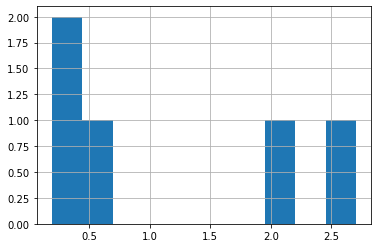

In [ ]:
df1['W'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025514C51408>,
      dtype=object)

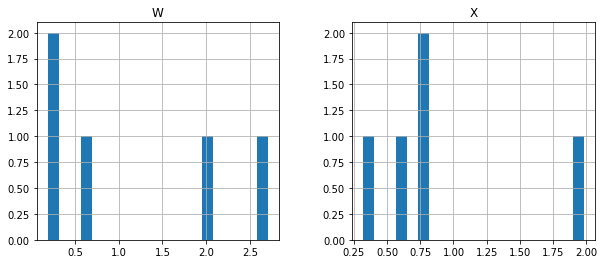

In [ ]:
df1.hist(column=['W','X'],bins=20,figsize=(10,4))

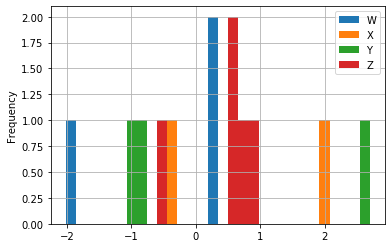

In [ ]:
df1.plot(kind='hist', bins=30, grid=True, figsize=(6,4))

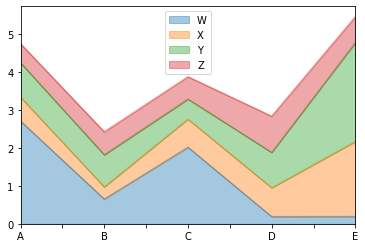

In [ ]:
import seaborn as sns #Plot style will change to Seaborn package style from now on
df2.plot.area(alpha=0.4)

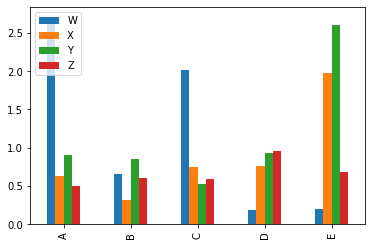

In [ ]:
df2.plot.bar()

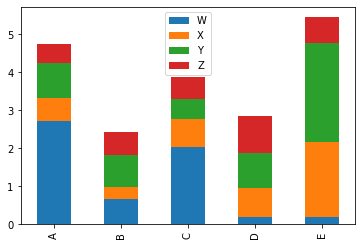

In [ ]:
df2.plot.bar(stacked=True)

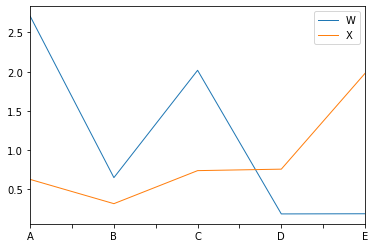

In [ ]:
df2.plot.line(y=['W','X'],figsize=(6,4),lw=1) # Note matplotlib arguments like 'lw' and 'figsize'

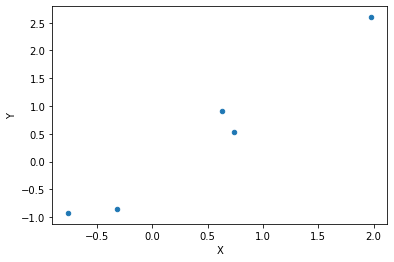

In [ ]:
df1.plot.scatter(x='X',y='Y',figsize=(6,4))

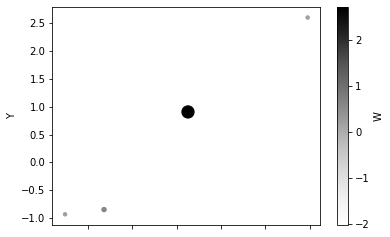

In [ ]:
df1.plot.scatter(x='X',y='Y',s=10*np.exp(df1['W']),c='W',figsize=(6,4)) # Size of the dots set based on column C

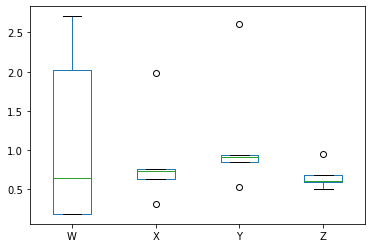

In [ ]:
df2.plot.box()

In [ ]:
df=pd.DataFrame(data=np.random.randn(1000,2),columns=['A','B'])
df.head()

,A,B
0,0.302665,1.693723
1,-1.706086,-1.159119
2,-0.134841,0.390528
3,0.166905,0.184502
4,0.807706,0.072960


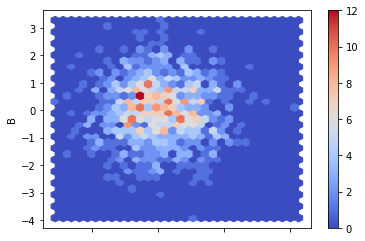

In [ ]:
df.plot.hexbin(x='A',y='B',gridsize=30,cmap='coolwarm')

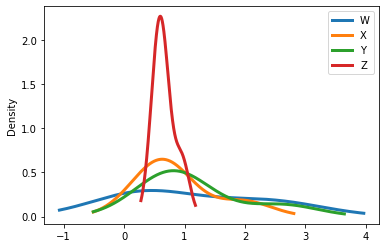

In [ ]:
df2.plot.density(lw=3)